#Prepare The Dataset

In [1]:
%%capture
!pip install ipython-autotime
%load_ext autotime

time: 438 µs (started: 2025-05-28 12:05:27 +00:00)


In [2]:
import pandas as pd
import os
from google.colab import files, drive

time: 946 ms (started: 2025-05-28 12:05:27 +00:00)


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.43 s (started: 2025-05-28 12:05:28 +00:00)


In [4]:
save_path = '/content/drive/MyDrive/DS Final Only Me/enron_labeled_clean.csv'
df = pd.read_csv(save_path)
df.head()

,column_a,message_id,date,from,to,subject,x_from,x_to,x_cc,x_bcc,x_folder,x_origin,x_filename,content,user,labeled,coarse_genre,included_forwarded,primary_topic,emotional_tone
0,379,<9831685.1075855725804.JavaMail.evans@thyme>,2001-03-15T14:45:00,frozenset({'phillip.allen@enron.com'}),frozenset({'todd.burke@enron.com'}),Re: Confidential Employee Information/Lenhart,Phillip K Allen,Todd Burke,NaN,NaN,\Phillip_Allen_June2001\Notes Folders\'sent mail,Allen-P,pallen.nsf,I also need to know the base salaries of Jay R...,allen-p,True,Company Business / Strategy,NaN,Internal Operations,NaN
1,381,<21041312.1075855725847.JavaMail.evans@thyme>,2001-03-15T14:11:00,frozenset({'phillip.allen@enron.com'}),frozenset({'kim.bolton@enron.com'}),RE: PERSONAL AND CONFIDENTIAL COMPENSATION INF...,Phillip K Allen,Kim Bolton,NaN,NaN,\Phillip_Allen_June2001\Notes Folders\'sent mail,Allen-P,pallen.nsf,Thanks for the information. It would be helpfu...,allen-p,True,Personal in Work Context,NaN,NaN,Anxiety
2,2139,<5907100.1075858639941.JavaMail.evans@thyme>,2001-06-20T17:04:51,frozenset({'k..allen@enron.com'}),"frozenset({'matt.smith@enron.com', 'matthew.le...",FW: Western Wholesale Activities - Gas & Power...,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...","Lenhart, Matthew </O=ENRON/OU=NA/CN=RECIPIENTS...",NaN,NaN,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Sen...",Allen-P,PALLEN (Non-Privileged).pst,"-----Original Message----- From: Hawkins, Bern...",allen-p,True,Logistics,Forwarded Emails + Replies,NaN,NaN
3,2140,<26625142.1075858639964.JavaMail.evans@thyme>,2001-06-20T17:09:00,frozenset({'k..allen@enron.com'}),"frozenset({'matt.smith@enron.com', 'matthew.le...",FW: Western Wholesale Activities - Gas & Power...,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...","Lenhart, Matthew </O=ENRON/OU=NA/CN=RECIPIENTS...",NaN,NaN,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Sen...",Allen-P,PALLEN (Non-Privileged).pst,"-----Original Message----- From: Perrino, Dave...",allen-p,True,Logistics,Forwarded Emails + Replies,NaN,NaN
4,2232,<19730598.1075858642129.JavaMail.evans@thyme>,2001-08-09T12:30:58,frozenset({'k..allen@enron.com'}),"frozenset({'matt.smith@enron.com', 'm..tholt@e...",FW: Western Wholesale Activities - Gas & Power...,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...","Smith, Matt </O=ENRON/OU=NA/CN=RECIPIENTS/CN=M...",NaN,NaN,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Sen...",Allen-P,PALLEN (Non-Privileged).pst,"-----Original Message----- From: Comnes, Alan ...",allen-p,True,Logistics,Forwarded Emails + Replies,NaN,NaN


time: 557 ms (started: 2025-05-28 12:05:29 +00:00)


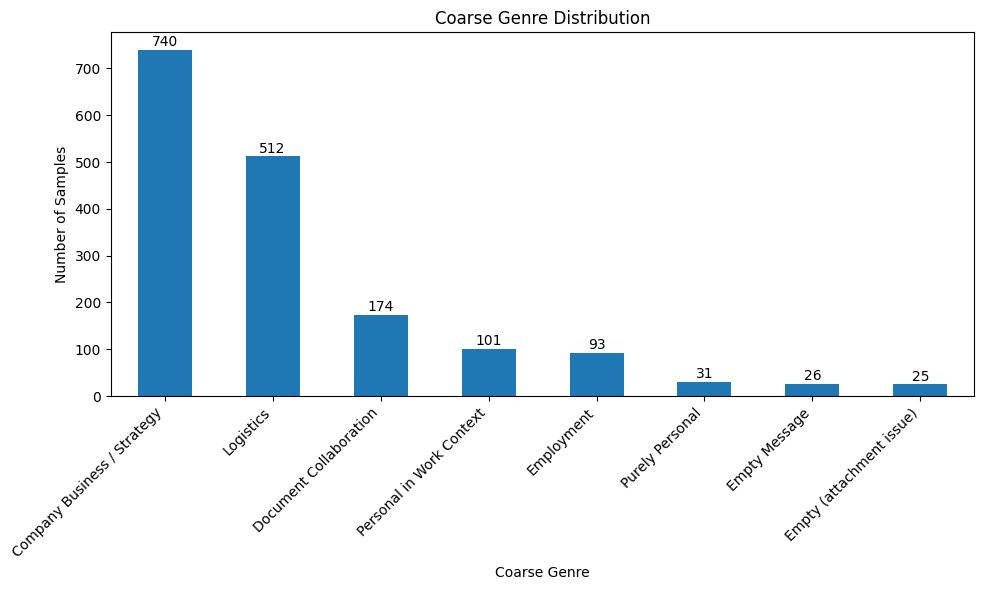

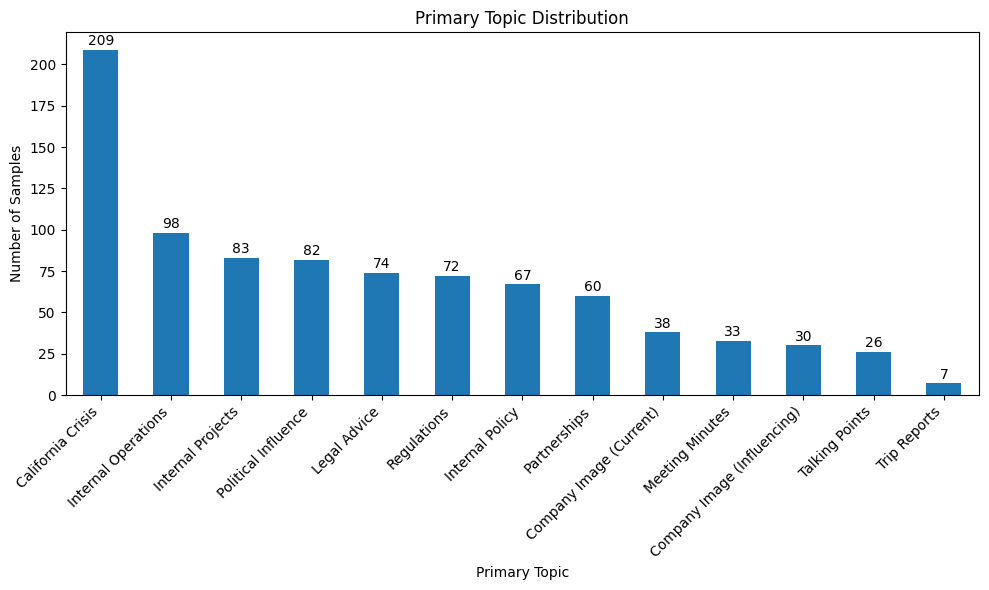

time: 1.23 s (started: 2025-05-28 12:05:30 +00:00)


In [5]:
import matplotlib.pyplot as plt

# Coarse Genre with counts
coarse_counts = df['coarse_genre'].value_counts()

plt.figure(figsize=(10,6))
ax = coarse_counts.plot(kind='bar', title='Coarse Genre Distribution')
plt.ylabel("Number of Samples")
plt.xlabel("Coarse Genre")
plt.xticks(rotation=45, ha='right')

# Add count labels
for i, count in enumerate(coarse_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Primary Topic with counts
primary_counts = df['primary_topic'].value_counts()

plt.figure(figsize=(10,6))
ax = primary_counts.plot(kind='bar', title='Primary Topic Distribution')
plt.ylabel("Number of Samples")
plt.xlabel("Primary Topic")
plt.xticks(rotation=45, ha='right')

# Add count labels
for i, count in enumerate(primary_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [6]:
#Combine "Purely Personal" + "Personal in Work Context" into a single label
df['coarse_genre'] = df['coarse_genre'].replace({
    'Purely Personal': 'Personal',
    'Personal in Work Context': 'Personal'
})

time: 12.7 ms (started: 2025-05-28 12:05:31 +00:00)


In [7]:
#Drop rows where coarse_genre is "Empty (attachment issue)" or "Empty Message"
df = df[~df['coarse_genre'].isin(['Empty (attachment issue)', 'Empty Message'])].copy()

time: 11 ms (started: 2025-05-28 12:05:31 +00:00)


In [8]:
# # Limit "Company Business / Strategy" and "Logistics" to max 160 rows each
# # Separate into groups
# df_business = df[df['coarse_genre'] == 'Company Business / Strategy'].sample(n=100, random_state=42)
# df_logistics = df[df['coarse_genre'] == 'Logistics'].sample(n=100, random_state=42)
# df_document = df[df['coarse_genre'] == 'Document Collaboration'].sample(n=100, random_state=42)
# df_personal = df[df['Personal'] == 'Personal'].sample(n=100, random_state=42)

# # Keep the rest as-is (all other categories)
# df_other = df[~df['coarse_genre'].isin(['Company Business / Strategy', 'Logistics', 'Document Collaboration', 'personal'])]

# # Combine into df_balanced
# df_balanced = pd.concat([df_business, df_logistics, df_document,df_personal, df_other], ignore_index=True)

time: 307 µs (started: 2025-05-28 12:05:31 +00:00)


In [9]:
# df_balanced = df.groupby('coarse_genre', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 100), random_state=42)).reset_index(drop=True)

time: 255 µs (started: 2025-05-28 12:05:31 +00:00)


In [10]:
# import matplotlib.pyplot as plt

# # Coarse Genre with counts
# coarse_counts = df_balanced['coarse_genre'].value_counts()

# plt.figure(figsize=(10,6))
# ax = coarse_counts.plot(kind='bar', title='Coarse Genre Distribution')
# plt.ylabel("Number of Samples")
# plt.xlabel("Coarse Genre")
# plt.xticks(rotation=45, ha='right')

# # Add count labels
# for i, count in enumerate(coarse_counts):
#     ax.text(i, count + 1, str(count), ha='center', va='bottom')

# plt.tight_layout()
# plt.show()


time: 265 µs (started: 2025-05-28 12:05:31 +00:00)


#Download

In [11]:
# df = df_balanced

time: 197 µs (started: 2025-05-28 12:05:31 +00:00)


In [12]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

time: 41.1 s (started: 2025-05-28 12:05:31 +00:00)


#Encoding

In [13]:
# 1. Combine subject and content into one text field
#df['text'] = df['subject'].astype(str) + ' ' + df['content'].astype(str)

df['text'] = (
    df['subject'].fillna('') + ' ' +
    df['content'].fillna('') + ' ' +
    df['x_folder'].fillna('') + ' ' +
    df['x_filename'].fillna('')
)

def inject_tags(row):
    text = row['text'].lower()
    tags = []

    if any(kw in text for kw in ['resume', 'cv', 'position', 'apply', 'hiring', 'job', 'interview', 'offer', 'candidate', 'recruit']):
        tags.append('[EMPLOYMENT]')

    if any(kw in text for kw in ['thank you', 'congratulations', 'happy birthday', 'good to see you', 'see you soon',
                                 'sorry', 'miss you', 'talk soon', 'thanks again', 'wedding', 'dinner', 'family', 'friends']):
        tags.append('[PERSONAL]')

    if any(kw in text for kw in ['meeting', 'schedule', 'call', 'join us', 'calendar', 'time', 'zoom', 'room', 'location', 'reminder']):
        tags.append('[LOGISTICS]')

    if any(kw in text for kw in ['attached', 'document', 'review', 'spreadsheet', 'draft', 'doc', 'ppt', 'attachment', 'slides']):
        tags.append('[DOCUMENT]')

    if any(kw in text for kw in ['project', 'strategy', 'analysis', 'report', 'budget', 'client', 'contract', 'performance',
                                 'plan', 'goal', 'financial', 'update', 'objective', 'initiative', 'proposal']):
        tags.append('[BUSINESS]')

    return ' '.join(tags) + ' ' + row['text'] if tags else row['text']

df['text'] = df.apply(inject_tags, axis=1)

time: 552 ms (started: 2025-05-28 12:06:13 +00:00)


In [14]:
# 2. Encode the target (coarse_genre)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['coarse_genre'])

# 3. Save the mapping (to use later for decoding predictions)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{'Company Business / Strategy': np.int64(0), 'Document Collaboration': np.int64(1), 'Employment': np.int64(2), 'Logistics': np.int64(3), 'Personal': np.int64(4)}
time: 4.73 ms (started: 2025-05-28 12:06:13 +00:00)


#Split

In [15]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

time: 42.8 ms (started: 2025-05-28 12:06:13 +00:00)


#Tokenize

In [16]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=256)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


time: 53.6 s (started: 2025-05-28 12:06:13 +00:00)


#Dataset Class

In [17]:
import torch
from torch.utils.data import Dataset

class EmailDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings  # tokenizer outputs
        self.labels = labels        # your numeric labels from LabelEncoder

    def __len__(self):
        return len(self.labels)  # how many samples in total

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

time: 942 µs (started: 2025-05-28 12:07:07 +00:00)


In [18]:
train_dataset = EmailDataset(train_encodings, train_labels)
val_dataset = EmailDataset(val_encodings, val_labels)

time: 468 µs (started: 2025-05-28 12:07:07 +00:00)


#Bert

In [19]:
!pip install -U transformers

time: 2.51 s (started: 2025-05-28 12:07:07 +00:00)


In [20]:
from transformers import BertConfig, BertForSequenceClassification

num_labels = len(label_encoder.classes_)  # should match your 7 selected tags

config = BertConfig.from_pretrained(
    'bert-base-uncased',
    num_labels=num_labels,
    hidden_dropout_prob=0.3,              # ⬅️ Increase dropout
    attention_probs_dropout_prob=0.3      # ⬅️ Dropout in attention layers
)

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    config=config
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


time: 404 ms (started: 2025-05-28 12:07:09 +00:00)


In [21]:
from transformers import BertForSequenceClassification
import torch
from torch.optim import AdamW

# Define number of labels from your label encoder
num_labels = len(label_encoder.classes_)

config = BertConfig.from_pretrained(
    'bert-base-uncased',
    num_labels=num_labels,
    hidden_dropout_prob=0.4,              # ⬅️ Increase dropout
    attention_probs_dropout_prob=0.4      # ⬅️ Dropout in attention layers
)

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    config=config
)

# Move model to device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


time: 725 ms (started: 2025-05-28 12:07:10 +00:00)


In [22]:
from torch.utils.data import DataLoader

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

time: 729 µs (started: 2025-05-28 12:07:10 +00:00)


In [23]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Compute weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define weighted loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor, label_smoothing=0.1)

time: 5.27 ms (started: 2025-05-28 12:07:10 +00:00)


In [24]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(8):  # Adjust number of epochs if needed
    print(f"\n🔁 Epoch {epoch + 1}")

    # === TRAINING ===
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)  # ✅ using class-weighted loss
        train_loss += loss.item()

        preds = outputs.logits.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loss.backward()
        optimizer.step()

    train_acc = correct / total
    avg_train_loss = train_loss / len(train_loader)

    # === VALIDATION ===
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs.logits, labels)
            val_loss += loss.item()

            preds = outputs.logits.argmax(dim=1)

            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_preds = all_preds
    val_labels = all_labels

    val_acc = correct / total
    avg_val_loss = val_loss / len(val_loader)

    print(f"✅ Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"🧪 Val   Loss: {avg_val_loss:.4f} | Val   Acc: {val_acc:.4f}")



🔁 Epoch 1


100%|██████████| 83/83 [00:52<00:00,  1.57it/s]


✅ Train Loss: 1.7757 | Train Acc: 0.1742
🧪 Val   Loss: 1.7458 | Val   Acc: 0.2810

🔁 Epoch 2


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 1.7353 | Train Acc: 0.2280
🧪 Val   Loss: 1.7129 | Val   Acc: 0.2659

🔁 Epoch 3


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 1.6556 | Train Acc: 0.3879
🧪 Val   Loss: 1.6104 | Val   Acc: 0.3112

🔁 Epoch 4


100%|██████████| 83/83 [00:53<00:00,  1.55it/s]


✅ Train Loss: 1.5273 | Train Acc: 0.5098
🧪 Val   Loss: 1.5749 | Val   Acc: 0.3293

🔁 Epoch 5


100%|██████████| 83/83 [00:53<00:00,  1.55it/s]


✅ Train Loss: 1.4205 | Train Acc: 0.5689
🧪 Val   Loss: 1.4074 | Val   Acc: 0.4653

🔁 Epoch 6


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 1.3414 | Train Acc: 0.6402
🧪 Val   Loss: 1.4596 | Val   Acc: 0.3746

🔁 Epoch 7


100%|██████████| 83/83 [00:53<00:00,  1.55it/s]


✅ Train Loss: 1.2506 | Train Acc: 0.6682
🧪 Val   Loss: 1.4057 | Val   Acc: 0.4834

🔁 Epoch 8


100%|██████████| 83/83 [00:53<00:00,  1.55it/s]


✅ Train Loss: 1.1960 | Train Acc: 0.6932
🧪 Val   Loss: 1.5245 | Val   Acc: 0.4018
time: 7min 41s (started: 2025-05-28 12:07:10 +00:00)


#Metrics

In [25]:
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = outputs.logits.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


time: 4.18 s (started: 2025-05-28 12:14:52 +00:00)


In [26]:
from sklearn.metrics import classification_report

# Get label IDs sorted as they appear in label_encoder
label_ids = list(range(len(label_encoder.classes_)))
target_names = label_encoder.inverse_transform(label_ids)

# Print report
print(classification_report(all_labels, all_preds, target_names=target_names))


                             precision    recall  f1-score   support

Company Business / Strategy       0.94      0.22      0.35       148
     Document Collaboration       0.20      0.97      0.33        35
                 Employment       0.27      0.84      0.41        19
                  Logistics       0.75      0.47      0.57       103
                   Personal       1.00      0.12      0.21        26

                   accuracy                           0.40       331
                  macro avg       0.63      0.52      0.37       331
               weighted avg       0.77      0.40      0.41       331

time: 17.7 ms (started: 2025-05-28 12:14:56 +00:00)


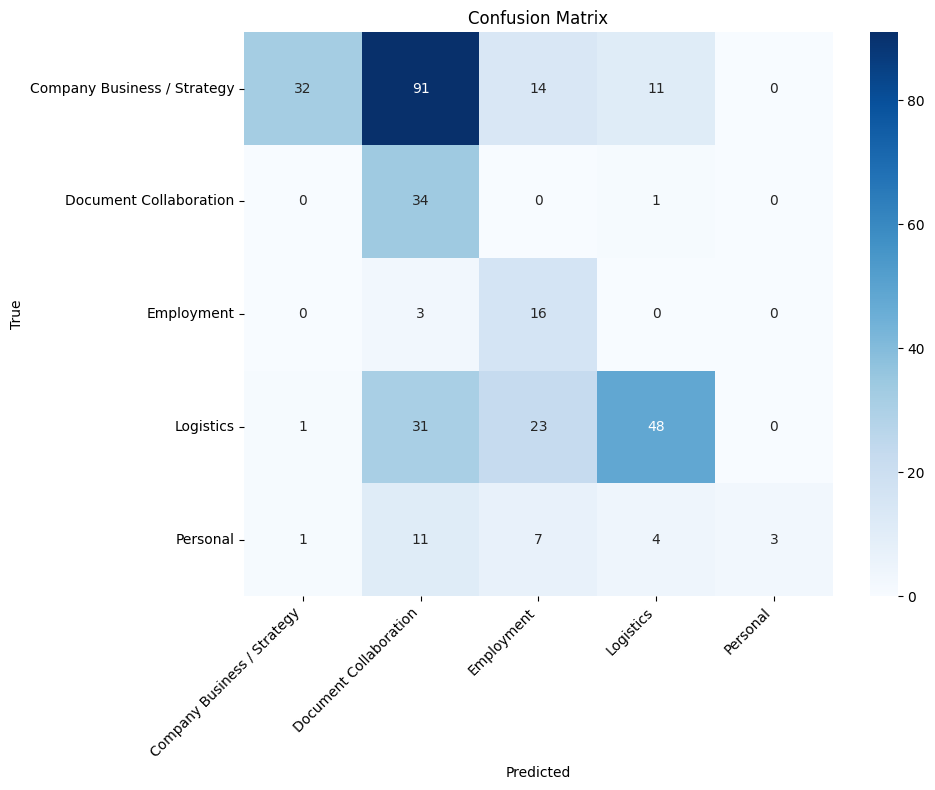

time: 941 ms (started: 2025-05-28 12:14:56 +00:00)


In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [28]:
df['coarse_genre'].value_counts()

,count
coarse_genre,
Company Business / Strategy,740
Logistics,512
Document Collaboration,174
Personal,132
Employment,93


time: 8.09 ms (started: 2025-05-28 12:14:57 +00:00)


In [29]:
import pandas as pd

# Rebuild the label decoding map
inv_label_map = {v: k for k, v in label_mapping.items()}

# Convert numeric labels to strings
true_labels_text = [inv_label_map[i] for i in val_labels]
pred_labels_text = [inv_label_map[i] for i in val_preds]

# # Build evaluation DataFrame
# df_eval = pd.DataFrame({
#     'text': val_texts,
#     'true_label': true_labels_text,
#     'pred_label': pred_labels_text
# })

val_texts_used = [val_texts[i] for i in range(len(val_labels))]

df_eval = pd.DataFrame({
    'text': val_texts_used,
    'true_label': [inv_label_map[i] for i in val_labels],
    'pred_label': [inv_label_map[i] for i in val_preds]
})


# Save to CSV
df_eval.to_csv("model_eval_results.csv", index=False)


time: 213 ms (started: 2025-05-28 12:14:57 +00:00)


In [30]:
from google.colab import files
files.download("model_eval_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 8.33 ms (started: 2025-05-28 12:14:57 +00:00)


#Improve

In [31]:
# Step 1: Load model prediction results
df_errors = pd.read_csv("model_eval_results.csv")

# Step 2: Keep only misclassified samples
df_misclassified = df_errors[df_errors['true_label'] != df_errors['pred_label']]

# Step 3: Merge into your labeled training DataFrame
# You need to map text to original df to recover label numbers
df_misclassified = df_misclassified.merge(
    df[['text', 'label']], on='text', how='left'
)

# Step 4: Append misclassified rows to original df
df_boosted = pd.concat([df, df_misclassified], ignore_index=True)

# ✅ Optional: Shuffle
df_boosted = df_boosted.sample(frac=1.0, random_state=42).reset_index(drop=True)

# 🔁 From here, continue with df_boosted instead of df:
# encoding, train/val split, tokenizer, model training, etc.


time: 104 ms (started: 2025-05-28 12:14:57 +00:00)


##Encoding

In [32]:
# 1. Combine subject and content into one text field
#df['text'] = df['subject'].astype(str) + ' ' + df['content'].astype(str)

df_boosted['text'] = (
    df_boosted['subject'].fillna('') + ' ' +
    df_boosted['content'].fillna('') + ' ' +
    df_boosted['x_folder'].fillna('') + ' ' +
    df_boosted['x_filename'].fillna('')
)

def inject_tags(row):
    text = row['text'].lower()
    tags = []

    if any(kw in text for kw in ['resume', 'cv', 'position', 'apply', 'hiring', 'job', 'interview', 'offer', 'candidate', 'recruit']):
        tags.append('[EMPLOYMENT]')

    if any(kw in text for kw in ['thank you', 'congratulations', 'happy birthday', 'good to see you', 'see you soon',
                                 'sorry', 'miss you', 'talk soon', 'thanks again', 'wedding', 'dinner', 'family', 'friends']):
        tags.append('[PERSONAL]')

    if any(kw in text for kw in ['meeting', 'schedule', 'call', 'join us', 'calendar', 'time', 'zoom', 'room', 'location', 'reminder']):
        tags.append('[LOGISTICS]')

    if any(kw in text for kw in ['attached', 'document', 'review', 'spreadsheet', 'draft', 'doc', 'ppt', 'attachment', 'slides']):
        tags.append('[DOCUMENT]')

    if any(kw in text for kw in ['project', 'strategy', 'analysis', 'report', 'budget', 'client', 'contract', 'performance',
                                 'plan', 'goal', 'financial', 'update', 'objective', 'initiative', 'proposal']):
        tags.append('[BUSINESS]')

    return ' '.join(tags) + ' ' + row['text'] if tags else row['text']

df_boosted['text'] = df_boosted.apply(inject_tags, axis=1)

time: 338 ms (started: 2025-05-28 12:14:57 +00:00)


In [33]:
# 2. Encode the target (coarse_genre)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_boosted['label'] = label_encoder.fit_transform(df_boosted['coarse_genre'])

# 3. Save the mapping (to use later for decoding predictions)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{'Company Business / Strategy': np.int64(0), 'Document Collaboration': np.int64(1), 'Employment': np.int64(2), 'Logistics': np.int64(3), 'Personal': np.int64(4), nan: np.int64(5)}
time: 2.48 ms (started: 2025-05-28 12:14:58 +00:00)


##Split

In [34]:
# from sklearn.model_selection import train_test_split

# train_texts, val_texts, train_labels, val_labels = train_test_split(
#     df_boosted['text'].tolist(), df_boosted['label'].tolist(),
#     test_size=0.2,
#     random_state=42,
#     stratify=df_boosted['label']
# )

# val_texts = df_boosted_2.loc[val_indices, 'text'].tolist()

from sklearn.model_selection import train_test_split

# Split using indices so we can fetch correct val_texts later
indices = list(range(len(df_boosted)))
train_idx, val_idx = train_test_split(
    indices,
    test_size=0.2,
    random_state=42,
    stratify=df_boosted['label']
)

# Create splits
train_texts = df_boosted.loc[train_idx, 'text'].tolist()
train_labels = df_boosted.loc[train_idx, 'label'].tolist()

val_texts = df_boosted.loc[val_idx, 'text'].tolist()
val_labels = df_boosted.loc[val_idx, 'label'].tolist()

time: 25.7 ms (started: 2025-05-28 12:14:58 +00:00)


##Tokenize

In [35]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=256)

time: 60 s (started: 2025-05-28 12:14:58 +00:00)


##DataSet Class

In [36]:
import torch
from torch.utils.data import Dataset

class EmailDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings  # tokenizer outputs
        self.labels = labels        # your numeric labels from LabelEncoder

    def __len__(self):
        return len(self.labels)  # how many samples in total

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

time: 849 µs (started: 2025-05-28 12:15:58 +00:00)


In [37]:
train_dataset = EmailDataset(train_encodings, train_labels)
val_dataset = EmailDataset(val_encodings, val_labels)

time: 420 µs (started: 2025-05-28 12:15:58 +00:00)


##Train

In [38]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(8):  # Adjust number of epochs if needed
    print(f"\n🔁 Epoch {epoch + 1}")

    # === TRAINING ===
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)  # ✅ using class-weighted loss
        train_loss += loss.item()

        preds = outputs.logits.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loss.backward()
        optimizer.step()

    train_acc = correct / total
    avg_train_loss = train_loss / len(train_loader)

    # === VALIDATION ===
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs.logits, labels)
            val_loss += loss.item()

            preds = outputs.logits.argmax(dim=1)

            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_preds = all_preds
    val_labels = all_labels

    val_acc = correct / total
    avg_val_loss = val_loss / len(val_loader)

    print(f"✅ Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"🧪 Val   Loss: {avg_val_loss:.4f} | Val   Acc: {val_acc:.4f}")



🔁 Epoch 1


100%|██████████| 83/83 [00:53<00:00,  1.54it/s]


✅ Train Loss: 1.1679 | Train Acc: 0.7045
🧪 Val   Loss: 1.4865 | Val   Acc: 0.4653

🔁 Epoch 2


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 1.0665 | Train Acc: 0.7447
🧪 Val   Loss: 1.4061 | Val   Acc: 0.5257

🔁 Epoch 3


100%|██████████| 83/83 [00:53<00:00,  1.55it/s]


✅ Train Loss: 1.0172 | Train Acc: 0.7705
🧪 Val   Loss: 1.4497 | Val   Acc: 0.5559

🔁 Epoch 4


100%|██████████| 83/83 [00:53<00:00,  1.55it/s]


✅ Train Loss: 0.9690 | Train Acc: 0.7871
🧪 Val   Loss: 1.4135 | Val   Acc: 0.6193

🔁 Epoch 5


100%|██████████| 83/83 [00:53<00:00,  1.55it/s]


✅ Train Loss: 0.9286 | Train Acc: 0.8167
🧪 Val   Loss: 1.6064 | Val   Acc: 0.5438

🔁 Epoch 6


100%|██████████| 83/83 [00:53<00:00,  1.55it/s]


✅ Train Loss: 0.9033 | Train Acc: 0.8265
🧪 Val   Loss: 1.4988 | Val   Acc: 0.5680

🔁 Epoch 7


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.8516 | Train Acc: 0.8629
🧪 Val   Loss: 1.4459 | Val   Acc: 0.6254

🔁 Epoch 8


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.8467 | Train Acc: 0.8765
🧪 Val   Loss: 1.5492 | Val   Acc: 0.5710
time: 7min 42s (started: 2025-05-28 12:15:58 +00:00)


##Metrics

In [39]:
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = outputs.logits.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


time: 4.14 s (started: 2025-05-28 12:23:40 +00:00)


In [40]:
from sklearn.metrics import classification_report

# Get label IDs sorted as they appear in label_encoder
label_ids = list(range(len(label_encoder.classes_)))
target_names = label_encoder.inverse_transform(label_ids)

# Print report
from sklearn.utils.multiclass import unique_labels

labels_in_val = unique_labels(all_labels, all_preds)
print(classification_report(all_labels, all_preds, labels=labels_in_val, target_names=[inv_label_map[i] for i in labels_in_val]))


                             precision    recall  f1-score   support

Company Business / Strategy       0.87      0.45      0.60       148
     Document Collaboration       0.25      0.86      0.38        35
                 Employment       0.48      0.74      0.58        19
                  Logistics       0.76      0.66      0.71       103
                   Personal       0.71      0.38      0.50        26

                   accuracy                           0.57       331
                  macro avg       0.62      0.62      0.55       331
               weighted avg       0.74      0.57      0.60       331

time: 16.7 ms (started: 2025-05-28 12:23:44 +00:00)


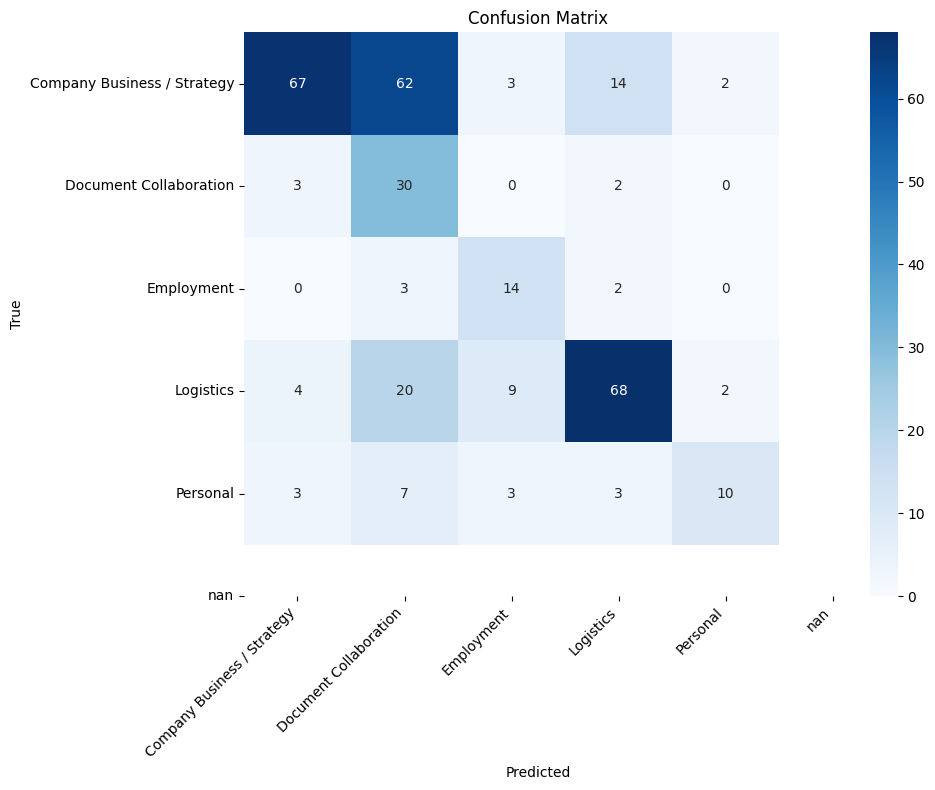

time: 382 ms (started: 2025-05-28 12:23:44 +00:00)


In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [42]:
df['coarse_genre'].value_counts()

,count
coarse_genre,
Company Business / Strategy,740
Logistics,512
Document Collaboration,174
Personal,132
Employment,93


time: 10.3 ms (started: 2025-05-28 12:23:45 +00:00)


In [43]:
print("val_texts:", len(val_texts))
print("val_labels:", len(val_labels))
print("val_preds:", len(val_preds))

val_texts: 370
val_labels: 331
val_preds: 331
time: 705 µs (started: 2025-05-28 12:23:45 +00:00)


In [44]:
import pandas as pd

# Rebuild the label decoding map
inv_label_map = {v: k for k, v in label_mapping.items()}

# Convert numeric labels to strings
true_labels_text = [inv_label_map[i] for i in val_labels]
pred_labels_text = [inv_label_map[i] for i in val_preds]

val_texts = df_boosted.loc[val_idx, 'text'].tolist()  # Make sure this is run again
# val_texts = df_boosted.loc[val_idx, 'text'].tolist()
val_texts_used = [val_texts[i] for i in range(len(val_labels))]

# assert len(val_texts) == len(val_preds) == len(val_labels)

# Build evaluation DataFrame
df_eval = pd.DataFrame({
    'text': val_texts_used,
    'true_label': true_labels_text,
    'pred_label': pred_labels_text
})

# Save to CSV
df_eval.to_csv("model_eval_results_2.csv", index=False)

time: 105 ms (started: 2025-05-28 12:23:45 +00:00)


In [45]:
from google.colab import files
files.download("model_eval_results_2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 3.41 ms (started: 2025-05-28 12:23:45 +00:00)


#Improve - second time

In [46]:
# Step 1: Load model prediction results
df_errors_2 = pd.read_csv("model_eval_results.csv")

# Step 2: Keep only misclassified samples
df_misclassified_2 = df_errors_2[df_errors_2['true_label'] != df_errors_2['pred_label']]

# Step 3: Merge into your labeled training DataFrame
# You need to map text to original df to recover label numbers
df_misclassified_2 = df_misclassified_2.merge(
    df[['text', 'label']], on='text', how='left'
)

# Step 4: Append misclassified rows to original df
df_boosted_2 = pd.concat([df_boosted, df_misclassified_2], ignore_index=True)

# ✅ Optional: Shuffle
df_boosted_2 = df_boosted_2.sample(frac=1.0, random_state=42).reset_index(drop=True)

# 🔁 From here, continue with df_boosted instead of df:
# encoding, train/val split, tokenizer, model training, etc.


time: 39.3 ms (started: 2025-05-28 12:23:45 +00:00)


##Encoding

In [47]:
# 1. Combine subject and content into one text field
#df['text'] = df['subject'].astype(str) + ' ' + df['content'].astype(str)

df_boosted_2['text'] = (
    df_boosted_2['subject'].fillna('') + ' ' +
    df_boosted_2['content'].fillna('') + ' ' +
    df_boosted_2['x_folder'].fillna('') + ' ' +
    df_boosted_2['x_filename'].fillna('')
)
def inject_tags(row):
    text = row['text'].lower()
    tags = []

    if any(kw in text for kw in ['resume', 'cv', 'position', 'apply', 'hiring', 'job', 'interview', 'offer', 'candidate', 'recruit']):
        tags.append('[EMPLOYMENT]')

    if any(kw in text for kw in ['thank you', 'congratulations', 'happy birthday', 'good to see you', 'see you soon',
                                 'sorry', 'miss you', 'talk soon', 'thanks again', 'wedding', 'dinner', 'family', 'friends']):
        tags.append('[PERSONAL]')

    if any(kw in text for kw in ['meeting', 'schedule', 'call', 'join us', 'calendar', 'time', 'zoom', 'room', 'location', 'reminder']):
        tags.append('[LOGISTICS]')

    if any(kw in text for kw in ['attached', 'document', 'review', 'spreadsheet', 'draft', 'doc', 'ppt', 'attachment', 'slides']):
        tags.append('[DOCUMENT]')

    if any(kw in text for kw in ['project', 'strategy', 'analysis', 'report', 'budget', 'client', 'contract', 'performance',
                                 'plan', 'goal', 'financial', 'update', 'objective', 'initiative', 'proposal']):
        tags.append('[BUSINESS]')

    return ' '.join(tags) + ' ' + row['text'] if tags else row['text']

df_boosted_2['text'] = df_boosted_2.apply(inject_tags, axis=1)

time: 246 ms (started: 2025-05-28 12:23:45 +00:00)


In [48]:
# 2. Encode the target (coarse_genre)
from sklearn.preprocessing import LabelEncoder

df_boosted_2 = df_boosted_2[df_boosted_2['coarse_genre'].notna()].reset_index(drop=True)

label_encoder = LabelEncoder()
df_boosted_2['label'] = label_encoder.fit_transform(df_boosted_2['coarse_genre'])

# 3. Save the mapping (to use later for decoding predictions)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{'Company Business / Strategy': np.int64(0), 'Document Collaboration': np.int64(1), 'Employment': np.int64(2), 'Logistics': np.int64(3), 'Personal': np.int64(4)}
time: 5.58 ms (started: 2025-05-28 12:23:45 +00:00)


##Split

In [49]:
# from sklearn.model_selection import train_test_split

# train_texts, val_texts, train_labels, val_labels = train_test_split(
#     df_boosted_2['text'].tolist(), df_boosted_2['label'].tolist(),
#     test_size=0.2,
#     random_state=42,
#     stratify=df_boosted_2['label']
# )

from sklearn.model_selection import train_test_split

# Split using indices so we can fetch correct val_texts later
indices = list(range(len(df_boosted_2)))
train_idx, val_idx = train_test_split(
    indices,
    test_size=0.2,
    random_state=42,
    stratify=df_boosted_2['label']
)

# Create splits
train_texts = df_boosted_2.loc[train_idx, 'text'].tolist()
train_labels = df_boosted_2.loc[train_idx, 'label'].tolist()

val_texts = df_boosted_2.loc[val_idx, 'text'].tolist()
val_labels = df_boosted_2.loc[val_idx, 'label'].tolist()


time: 6.81 ms (started: 2025-05-28 12:23:45 +00:00)


##Balancing

In [50]:
from sklearn.utils import resample

# Separate each class
df_list = []
max_size = df_boosted_2['coarse_genre'].value_counts().max()

for label in df_boosted_2['coarse_genre'].unique():
    df_label = df_boosted_2[df_boosted_2['coarse_genre'] == label]
    if len(df_label) > 0:
        df_upsampled = resample(df_label,
                                replace=True,
                                n_samples=max_size,
                                random_state=42)
        df_list.append(df_upsampled)

# Combine back
df_boosted_2 = pd.concat(df_list).sample(frac=1.0, random_state=42).reset_index(drop=True)

time: 17.8 ms (started: 2025-05-28 12:23:45 +00:00)


##Tokenize

In [51]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=256)

time: 34.7 s (started: 2025-05-28 12:23:45 +00:00)


##DataSet Class

In [52]:
import torch
from torch.utils.data import Dataset

class EmailDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings  # tokenizer outputs
        self.labels = labels        # your numeric labels from LabelEncoder

    def __len__(self):
        return len(self.labels)  # how many samples in total

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

time: 774 µs (started: 2025-05-28 12:24:20 +00:00)


In [53]:
train_dataset = EmailDataset(train_encodings, train_labels)
val_dataset = EmailDataset(val_encodings, val_labels)

time: 374 µs (started: 2025-05-28 12:24:20 +00:00)


##Train

Change optimizer before running

In [54]:
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

time: 1.15 ms (started: 2025-05-28 12:24:20 +00:00)


In [55]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(df_boosted_2['label']),
                                     y=df_boosted_2['label'])

class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)


time: 2.77 ms (started: 2025-05-28 12:24:20 +00:00)


In [56]:
print(len(label_encoder.classes_))
print(label_encoder.classes_)

5
['Company Business / Strategy' 'Document Collaboration' 'Employment'
 'Logistics' 'Personal']
time: 1.01 ms (started: 2025-05-28 12:24:20 +00:00)


In [57]:
print(model.config.num_labels)


5
time: 2.51 ms (started: 2025-05-28 12:24:20 +00:00)


In [58]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(8):  # Adjust number of epochs if needed
    print(f"\n🔁 Epoch {epoch + 1}")

    # === TRAINING ===
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)  # ✅ using class-weighted loss
        train_loss += loss.item()

        preds = outputs.logits.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loss.backward()
        optimizer.step()

    train_acc = correct / total
    avg_train_loss = train_loss / len(train_loader)

    # === VALIDATION ===
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs.logits, labels)
            val_loss += loss.item()

            preds = outputs.logits.argmax(dim=1)

            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_preds = all_preds
    val_labels = all_labels

    val_acc = correct / total
    avg_val_loss = val_loss / len(val_loader)

    print(f"✅ Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"🧪 Val   Loss: {avg_val_loss:.4f} | Val   Acc: {val_acc:.4f}")



🔁 Epoch 1


100%|██████████| 83/83 [00:53<00:00,  1.54it/s]


✅ Train Loss: 0.3935 | Train Acc: 0.8795
🧪 Val   Loss: 1.2100 | Val   Acc: 0.6375

🔁 Epoch 2


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.2995 | Train Acc: 0.8962
🧪 Val   Loss: 1.2379 | Val   Acc: 0.6495

🔁 Epoch 3


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.2277 | Train Acc: 0.9265
🧪 Val   Loss: 1.2962 | Val   Acc: 0.6284

🔁 Epoch 4


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.2140 | Train Acc: 0.9303
🧪 Val   Loss: 1.3095 | Val   Acc: 0.6677

🔁 Epoch 5


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.1746 | Train Acc: 0.9439
🧪 Val   Loss: 1.3272 | Val   Acc: 0.6677

🔁 Epoch 6


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.1869 | Train Acc: 0.9356
🧪 Val   Loss: 1.2027 | Val   Acc: 0.6979

🔁 Epoch 7


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.1668 | Train Acc: 0.9417
🧪 Val   Loss: 1.4319 | Val   Acc: 0.6284

🔁 Epoch 8


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.1613 | Train Acc: 0.9545
🧪 Val   Loss: 1.3390 | Val   Acc: 0.6979
time: 7min 41s (started: 2025-05-28 12:24:20 +00:00)


##Metrics

In [59]:
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = outputs.logits.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


time: 4.14 s (started: 2025-05-28 12:32:02 +00:00)


In [60]:
from sklearn.metrics import classification_report

# Get label IDs sorted as they appear in label_encoder
label_ids = list(range(len(label_encoder.classes_)))
target_names = label_encoder.inverse_transform(label_ids)

# Print report
from sklearn.utils.multiclass import unique_labels

labels_in_val = unique_labels(all_labels, all_preds)
print(classification_report(all_labels, all_preds, labels=labels_in_val, target_names=[inv_label_map[i] for i in labels_in_val]))


                             precision    recall  f1-score   support

Company Business / Strategy       0.80      0.70      0.75       148
     Document Collaboration       0.42      0.80      0.55        35
                 Employment       0.60      0.63      0.62        19
                  Logistics       0.77      0.73      0.75       103
                   Personal       0.67      0.46      0.55        26

                   accuracy                           0.70       331
                  macro avg       0.65      0.66      0.64       331
               weighted avg       0.73      0.70      0.70       331

time: 15.4 ms (started: 2025-05-28 12:32:06 +00:00)


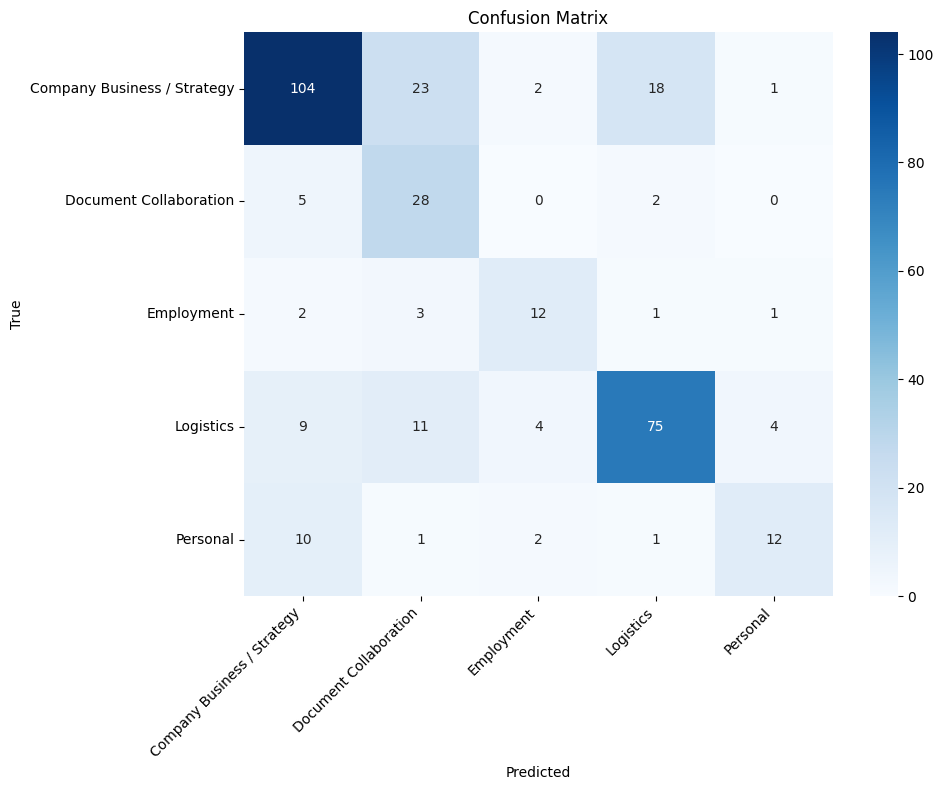

time: 387 ms (started: 2025-05-28 12:32:06 +00:00)


In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[inv_label_map[i] for i in labels_in_val],
            yticklabels=[inv_label_map[i] for i in labels_in_val])


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [62]:
df['coarse_genre'].value_counts()

,count
coarse_genre,
Company Business / Strategy,740
Logistics,512
Document Collaboration,174
Personal,132
Employment,93


time: 9.48 ms (started: 2025-05-28 12:32:06 +00:00)


In [66]:
import pandas as pd

# Rebuild the label decoding map
inv_label_map = {v: k for k, v in label_mapping.items()}

# Convert numeric labels to strings
true_labels_text = [inv_label_map[i] for i in val_labels]
pred_labels_text = [inv_label_map[i] for i in val_preds]

val_texts = df_boosted_2.loc[val_idx, 'text'].tolist()  # Make sure this is run again
# val_texts = df_boosted.loc[val_idx, 'text'].tolist()
val_texts_used = [val_texts[i] for i in range(len(val_labels))]

# assert len(val_texts) == len(val_preds) == len(val_labels)

# Build evaluation DataFrame
df_eval = pd.DataFrame({
    'text': val_texts_used,
    'true_label': true_labels_text,
    'pred_label': pred_labels_text
})

# Save to CSV
df_eval.to_csv("model_eval_results_3.csv", index=False)

time: 81.6 ms (started: 2025-05-28 12:36:05 +00:00)


In [64]:
# from google.colab import files
# files.download("model_eval_results_3.csv")

time: 330 µs (started: 2025-05-28 12:32:06 +00:00)


#Improve - third time

In [105]:
# Step 1: Load model prediction results
df_errors_3 = pd.read_csv("model_eval_results.csv")

# Step 2: Keep only misclassified samples
df_misclassified_3 = df_errors_3[df_errors_3['true_label'] != df_errors_3['pred_label']]

# Step 3: Merge into your labeled training DataFrame
# You need to map text to original df to recover label numbers
df_misclassified_3 = df_misclassified_3.merge(
    df[['text', 'label']], on='text', how='left'
)

# Step 4: Append misclassified rows to original df
df_boosted_3 = pd.concat([df_boosted_2, df_misclassified_3], ignore_index=True)

# ✅ Optional: Shuffle
df_boosted_3 = df_boosted_3.sample(frac=1.0, random_state=42).reset_index(drop=True)

# 🔁 From here, continue with df_boosted instead of df:
# encoding, train/val split, tokenizer, model training, etc.


time: 38.1 ms (started: 2025-05-28 12:56:57 +00:00)


##Encoding

In [106]:
# 1. Combine subject and content into one text field
#df['text'] = df['subject'].astype(str) + ' ' + df['content'].astype(str)

df_boosted_3['text'] = (
    df_boosted_3['subject'].fillna('') + ' ' +
    df_boosted_3['content'].fillna('') + ' ' +
    df_boosted_3['x_folder'].fillna('') + ' ' +
    df_boosted_3['x_filename'].fillna('')
)
def inject_tags(row):
    text = row['text'].lower()
    tags = []

    if any(kw in text for kw in ['resume', 'cv', 'position', 'apply', 'hiring', 'job', 'interview', 'offer', 'candidate', 'recruit']):
        tags.append('[EMPLOYMENT]')

    if any(kw in text for kw in ['thank you', 'congratulations', 'happy birthday', 'good to see you', 'see you soon',
                                 'sorry', 'miss you', 'talk soon', 'thanks again', 'wedding', 'dinner', 'family', 'friends']):
        tags.append('[PERSONAL]')

    if any(kw in text for kw in ['meeting', 'schedule', 'call', 'join us', 'calendar', 'time', 'zoom', 'room', 'location', 'reminder']):
        tags.append('[LOGISTICS]')

    if any(kw in text for kw in ['attached', 'document', 'review', 'spreadsheet', 'draft', 'doc', 'ppt', 'attachment', 'slides']):
        tags.append('[DOCUMENT]')

    if any(kw in text for kw in ['project', 'strategy', 'analysis', 'report', 'budget', 'client', 'contract', 'performance',
                                 'plan', 'goal', 'financial', 'update', 'objective', 'initiative', 'proposal']):
        tags.append('[BUSINESS]')

    return ' '.join(tags) + ' ' + row['text'] if tags else row['text']

df_boosted_3['text'] = df_boosted_3.apply(inject_tags, axis=1)

time: 318 ms (started: 2025-05-28 12:56:57 +00:00)


In [107]:
# 2. Encode the target (coarse_genre)
from sklearn.preprocessing import LabelEncoder

df_boosted_3 = df_boosted_3[df_boosted_3['coarse_genre'].notna()].reset_index(drop=True)

label_encoder = LabelEncoder()
df_boosted_3['label'] = label_encoder.fit_transform(df_boosted_3['coarse_genre'])

# 3. Save the mapping (to use later for decoding predictions)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{'Company Business / Strategy': np.int64(0), 'Document Collaboration': np.int64(1), 'Employment': np.int64(2), 'Logistics': np.int64(3), 'Personal': np.int64(4)}
time: 7.69 ms (started: 2025-05-28 12:56:58 +00:00)


##Split

In [108]:
# from sklearn.model_selection import train_test_split

# train_texts, val_texts, train_labels, val_labels = train_test_split(
#     df_boosted_2['text'].tolist(), df_boosted_2['label'].tolist(),
#     test_size=0.2,
#     random_state=42,
#     stratify=df_boosted_2['label']
# )

from sklearn.model_selection import train_test_split

# Split using indices so we can fetch correct val_texts later
indices = list(range(len(df_boosted_3)))
train_idx, val_idx = train_test_split(
    indices,
    test_size=0.2,
    random_state=42,
    stratify=df_boosted_3['label']
)

# Create splits
train_texts = df_boosted_3.loc[train_idx, 'text'].tolist()
train_labels = df_boosted_3.loc[train_idx, 'label'].tolist()

val_texts = df_boosted_3.loc[val_idx, 'text'].tolist()
val_labels = df_boosted_3.loc[val_idx, 'label'].tolist()


time: 7.19 ms (started: 2025-05-28 12:56:58 +00:00)


##Balancing

In [109]:
from sklearn.utils import resample

# Separate each class
df_list = []
max_size = df_boosted_3['coarse_genre'].value_counts().max()

for label in df_boosted_3['coarse_genre'].unique():
    df_label = df_boosted_3[df_boosted_3['coarse_genre'] == label]
    if len(df_label) > 0:
        df_upsampled = resample(df_label,
                                replace=True,
                                n_samples=max_size,
                                random_state=42)
        df_list.append(df_upsampled)

# Combine back
df_boosted_3 = pd.concat(df_list).sample(frac=1.0, random_state=42).reset_index(drop=True)

time: 19.7 ms (started: 2025-05-28 12:56:58 +00:00)


##Tokenize

In [110]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=256)

time: 51.4 s (started: 2025-05-28 12:56:58 +00:00)


##DataSet Class

In [111]:
import torch
from torch.utils.data import Dataset

class EmailDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings  # tokenizer outputs
        self.labels = labels        # your numeric labels from LabelEncoder

    def __len__(self):
        return len(self.labels)  # how many samples in total

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

time: 661 µs (started: 2025-05-28 12:57:49 +00:00)


In [112]:
train_dataset = EmailDataset(train_encodings, train_labels)
val_dataset = EmailDataset(val_encodings, val_labels)

time: 288 µs (started: 2025-05-28 12:57:49 +00:00)


##Train

Change optimizer before running

In [113]:
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)

time: 1.22 ms (started: 2025-05-28 12:57:49 +00:00)


In [114]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(df_boosted_3['label']),
                                     y=df_boosted_3['label'])

class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)


time: 4.21 ms (started: 2025-05-28 12:57:49 +00:00)


In [115]:
print(len(label_encoder.classes_))
print(label_encoder.classes_)

5
['Company Business / Strategy' 'Document Collaboration' 'Employment'
 'Logistics' 'Personal']
time: 721 µs (started: 2025-05-28 12:57:49 +00:00)


In [116]:
print(model.config.num_labels)


5
time: 733 µs (started: 2025-05-28 12:57:49 +00:00)


In [117]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(8):  # Adjust number of epochs if needed
    print(f"\n🔁 Epoch {epoch + 1}")

    # === TRAINING ===
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)  # ✅ using class-weighted loss
        train_loss += loss.item()

        preds = outputs.logits.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loss.backward()
        optimizer.step()

    train_acc = correct / total
    avg_train_loss = train_loss / len(train_loader)

    # === VALIDATION ===
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs.logits, labels)
            val_loss += loss.item()

            preds = outputs.logits.argmax(dim=1)

            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_preds = all_preds
    val_labels = all_labels

    val_acc = correct / total
    avg_val_loss = val_loss / len(val_loader)

    print(f"✅ Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"🧪 Val   Loss: {avg_val_loss:.4f} | Val   Acc: {val_acc:.4f}")



🔁 Epoch 1


100%|██████████| 83/83 [00:50<00:00,  1.65it/s]


✅ Train Loss: 0.0608 | Train Acc: 0.9803
🧪 Val   Loss: 1.6456 | Val   Acc: 0.6767

🔁 Epoch 2


100%|██████████| 83/83 [00:51<00:00,  1.61it/s]


✅ Train Loss: 0.0560 | Train Acc: 0.9795
🧪 Val   Loss: 1.7020 | Val   Acc: 0.6677

🔁 Epoch 3


100%|██████████| 83/83 [00:52<00:00,  1.59it/s]


✅ Train Loss: 0.0481 | Train Acc: 0.9848
🧪 Val   Loss: 1.7152 | Val   Acc: 0.6465

🔁 Epoch 4


100%|██████████| 83/83 [00:52<00:00,  1.57it/s]


✅ Train Loss: 0.0514 | Train Acc: 0.9848
🧪 Val   Loss: 1.7569 | Val   Acc: 0.6526

🔁 Epoch 5


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.0506 | Train Acc: 0.9848
🧪 Val   Loss: 1.7168 | Val   Acc: 0.6707

🔁 Epoch 6


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.0409 | Train Acc: 0.9848
🧪 Val   Loss: 1.6820 | Val   Acc: 0.6737

🔁 Epoch 7


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.0471 | Train Acc: 0.9811
🧪 Val   Loss: 1.6112 | Val   Acc: 0.6918

🔁 Epoch 8


100%|██████████| 83/83 [00:53<00:00,  1.56it/s]


✅ Train Loss: 0.0528 | Train Acc: 0.9818
🧪 Val   Loss: 1.5999 | Val   Acc: 0.6767
time: 7min 34s (started: 2025-05-28 12:57:49 +00:00)


##Metrics

In [118]:
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = outputs.logits.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


time: 4.13 s (started: 2025-05-28 13:05:24 +00:00)


In [119]:
from sklearn.metrics import classification_report

# Get label IDs sorted as they appear in label_encoder
label_ids = list(range(len(label_encoder.classes_)))
target_names = label_encoder.inverse_transform(label_ids)

# Print report
from sklearn.utils.multiclass import unique_labels

labels_in_val = unique_labels(all_labels, all_preds)
print(classification_report(all_labels, all_preds, labels=labels_in_val, target_names=[inv_label_map[i] for i in labels_in_val]))


                             precision    recall  f1-score   support

Company Business / Strategy       0.81      0.68      0.74       148
     Document Collaboration       0.37      0.80      0.51        35
                 Employment       0.60      0.63      0.62        19
                  Logistics       0.76      0.70      0.73       103
                   Personal       0.67      0.46      0.55        26

                   accuracy                           0.68       331
                  macro avg       0.64      0.65      0.63       331
               weighted avg       0.73      0.68      0.69       331

time: 11.1 ms (started: 2025-05-28 13:05:28 +00:00)


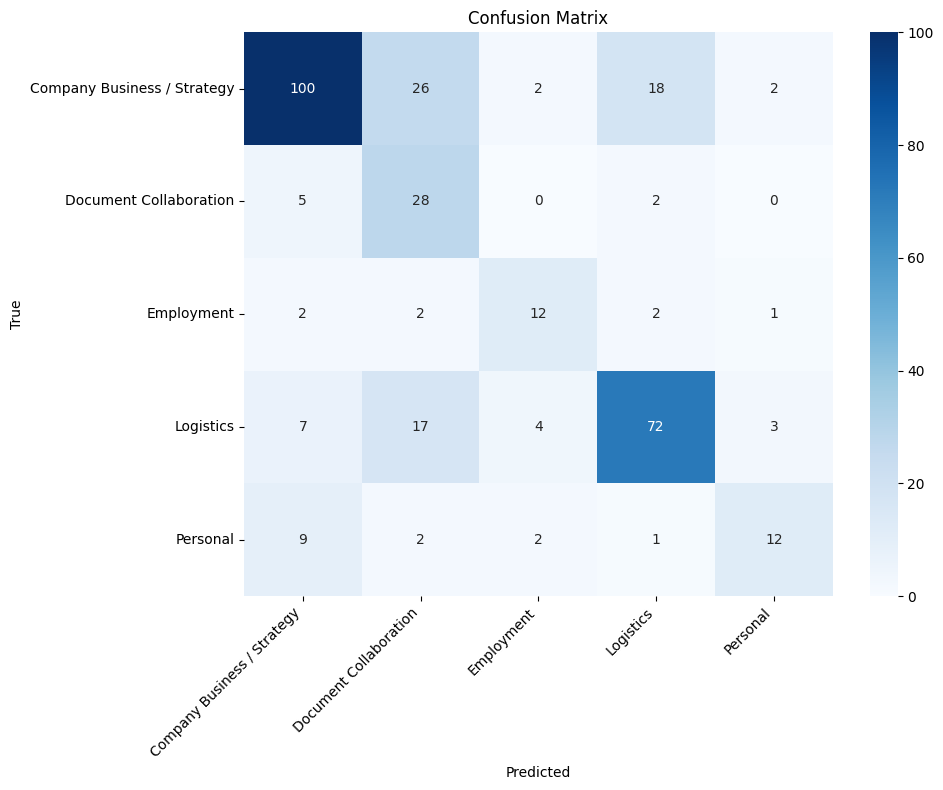

time: 771 ms (started: 2025-05-28 13:05:28 +00:00)


In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[inv_label_map[i] for i in labels_in_val],
            yticklabels=[inv_label_map[i] for i in labels_in_val])


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [121]:
df['coarse_genre'].value_counts()

,count
coarse_genre,
Company Business / Strategy,740
Logistics,512
Document Collaboration,174
Personal,132
Employment,93


time: 8.17 ms (started: 2025-05-28 13:05:29 +00:00)


In [122]:
# import pandas as pd

# # Rebuild the label decoding map
# inv_label_map = {v: k for k, v in label_mapping.items()}

# # Convert numeric labels to strings
# true_labels_text = [inv_label_map[i] for i in val_labels]
# pred_labels_text = [inv_label_map[i] for i in val_preds]

# val_texts = df_boosted_2.loc[val_idx, 'text'].tolist()  # Make sure this is run again
# # val_texts = df_boosted.loc[val_idx, 'text'].tolist()
# val_texts_used = [val_texts[i] for i in range(len(val_labels))]

# # assert len(val_texts) == len(val_preds) == len(val_labels)

# # Build evaluation DataFrame
# df_eval = pd.DataFrame({
#     'text': val_texts_used,
#     'true_label': true_labels_text,
#     'pred_label': pred_labels_text
# })

# # Save to CSV
# df_eval.to_csv("model_eval_results_3.csv", index=False)

time: 244 µs (started: 2025-05-28 13:05:29 +00:00)


In [123]:
# from google.colab import files
# files.download("model_eval_results_3.csv")

time: 191 µs (started: 2025-05-28 13:05:29 +00:00)
